In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from handson import get_scores, plot_predict_result
%matplotlib notebook

In [7]:
df = pd.read_csv('../data/ready/dataset_houses.csv')
df = df[(df['precio'] < 1000000) & (df['precio'] > 45000)]

features = df.drop(columns='precio')
price = df['precio']

# Usefull methods to explore features
- df.description()
- df.shape
- df.count()
- df.sum()
- df.mean()
- df.std()
- df.corr()

- `df['feature'].unique()`
- `df.nunique()`
- `df['feature'].isna()`



# Modeling

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
# Train/test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Descomposition
from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
# Cross-validation
from sklearn.model_selection import cross_val_score

from scipy.stats import norm, skew


## Split train and test dataset

In [9]:
X_train, X_test = train_test_split(features, test_size=0.2, random_state=0)
y_train, y_test = train_test_split(price, test_size=0.2, random_state=0)

## Check train and test distributions

In [10]:
f, ax = plt.subplots(1,3)
sns.distplot(y_train, bins=100, hist_kws={'alpha':0.5}, fit=norm, ax=ax[0]);
sns.distplot(y_test, bins=100, hist_kws={'alpha':0.5}, fit=norm, ax=ax[0]);
sns.distplot(np.log1p(y_test), bins=100, hist_kws={'alpha':0.5}, fit=norm, ax=ax[1]);
sns.distplot(np.cbrt(y_test), bins=100, hist_kws={'alpha':0.5}, fit=norm, ax=ax[2]);


<IPython.core.display.Javascript object>

## Scale dataset

In [11]:
# scaler =  RobustScaler(quantile_range=(25, 75))
scaler_target = QuantileTransformer(output_distribution='normal', ) 
# scaler = PowerTransformer(method='box-cox')  # Non Linear | Strictly positive data
# scaler = PowerTransformer(method='yeo-johnson')  # Non Linear 
scaler_feature = MinMaxScaler()
scaler_std_feature = StandardScaler()


In [12]:
# X_train_norm = scaler_feature.fit_transform(X_train)
# X_test_norm = scaler_feature.transform(X_test)
X_train_norm = scaler_std_feature.fit_transform(X_train)
X_test_norm = scaler_std_feature.transform(X_test)

y_train_norm = scaler_target.fit_transform(y_train.to_numpy()[:, None])
y_test_norm = scaler_target.transform(y_test.to_numpy()[:, None])

## PCA analysis

In [13]:
pca = PCA(n_components=0.95, )
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [14]:
pca.explained_variance_ratio_

array([0.11212629, 0.05463039, 0.0484868 , 0.04081713, 0.03903386,
       0.03222595, 0.02987092, 0.02972219, 0.02904844, 0.02871901,
       0.0281166 , 0.0275625 , 0.0273896 , 0.0269467 , 0.02675255,
       0.02655043, 0.02646882, 0.02625357, 0.02593886, 0.02587222,
       0.02575978, 0.02550877, 0.02503569, 0.02393182, 0.02375208,
       0.02316755, 0.02155588, 0.02012516, 0.01891067, 0.01638652,
       0.01544393])

In [15]:
sns.pairplot(pd.DataFrame(X_train_pca[:, 0:4]))

<IPython.core.display.Javascript object>

In [16]:
# color = features.loc[features.index, 'zona'].astype('category').cat.codes
color = X_train.iloc[:, 2]
f, ax = plt.subplots(2,2)
ax[0, 0].scatter(X_train_pca[:,0], X_train_pca[:,1], c=color, alpha=0.4)
ax[0, 1].scatter(X_train_pca[:,1], X_train_pca[:,2], c=color, alpha=0.4)
ax[1, 0].scatter(X_train_pca[:,0], X_train_pca[:,2], c=color, alpha=0.4)
ax[1, 1].scatter(X_train_pca[:,3], X_train_pca[:,5], c=color, alpha=0.4)

<IPython.core.display.Javascript object>

# Choosing a model

## Linear Model

Test: MSE=7235737000.80, MAE=55060.19, MEAE=33802.00, $R^2$=0.76
Train: MSE=7482218644.02, MAE=55246.74, MEAE=33648.39, $R^2$=0.76


<IPython.core.display.Javascript object>


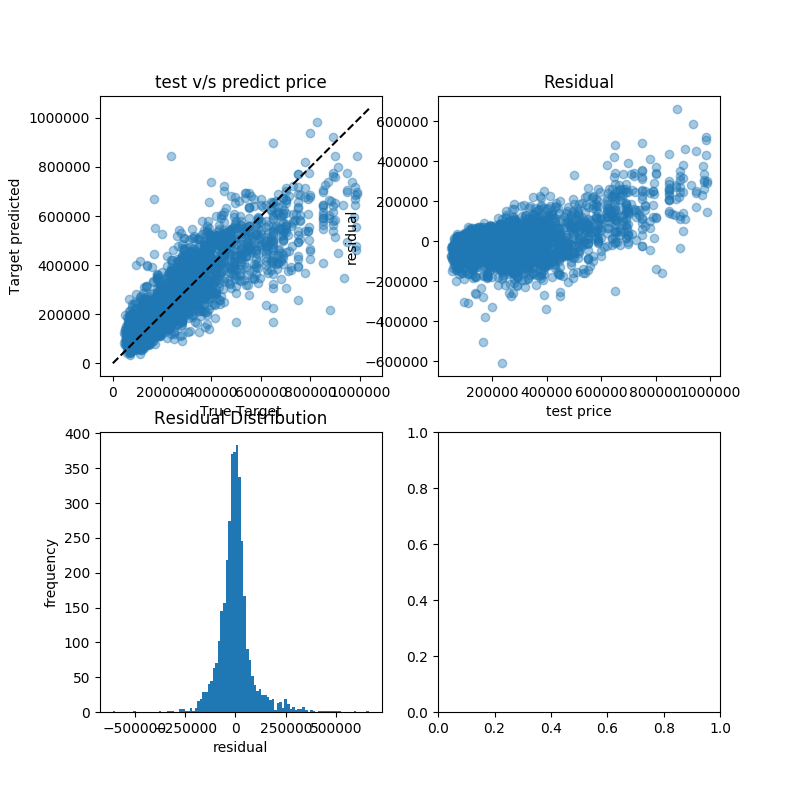

In [18]:
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train_norm, y_train)
#model.coef_, model.intercept_, model.rank_

pred_test_price_lr = model_lr.predict(X_test_norm)
pred_train_price_lr = model_lr.predict(X_train_norm)
print('Test: ' + get_scores(y_test, pred_test_price_lr))
print('Train: ' + get_scores(y_train, pred_train_price_lr))


f, ax = plot_predict_result(y_test, pred_test_price_lr)


In [19]:
model_lr_pca = LinearRegression(fit_intercept=True)
model_lr_pca.fit(X_train_pca, y_train)
#model.coef_, model.intercept_, model.rank_

pred_test_price_lr_pca = model_lr_pca.predict(X_test_pca)
pred_train_price_lr_pca = model_lr_pca.predict(X_train_pca)
print('Test: ' + get_scores(y_test, pred_test_price_lr_pca))
print('Train: ' + get_scores(y_train, pred_train_price_lr_pca))


f, ax = plot_predict_result(y_test, pred_test_price_lr_pca, figsize=(10, 10))


Test: MSE=8205103404.44, MAE=58613.60, MEAE=35882.42, $R^2$=0.73
Train: MSE=8355307143.96, MAE=58727.61, MEAE=35163.57, $R^2$=0.74


<IPython.core.display.Javascript object>

## Transformed Target Regressor

In [20]:
model_rg = RidgeCV()
model_rg.fit(X_train_norm, y_train)

pred_test_price_rg = model_rg.predict(X_test_norm)
pred_train_price_rg = model_rg.predict(X_train_norm)
print('Test: ' + get_scores(y_test, pred_test_price_rg))
print('Train: ' + get_scores(y_train, pred_train_price_rg))


f, ax = plot_predict_result(y_test, pred_test_price_rg, figsize=(10, 10))

Test: MSE=7236180114.37, MAE=55096.71, MEAE=33498.17, $R^2$=0.76
Train: MSE=7481696462.24, MAE=55260.87, MEAE=33620.08, $R^2$=0.76


<IPython.core.display.Javascript object>

In [21]:
model_rg = RidgeCV()
model_rg.fit(X_train_pca, y_train)

pred_test_price_rg = model_rg.predict(X_test_pca)
pred_train_price_rg = model_rg.predict(X_train_pca)
print('Test: ' + get_scores(y_test, pred_test_price_rg))
print('Train: ' + get_scores(y_train, pred_train_price_rg))


f, ax = plot_predict_result(y_test, pred_test_price_rg, figsize=(10, 10))

Test: MSE=8205247568.37, MAE=58612.23, MEAE=35901.17, $R^2$=0.73
Train: MSE=8355308366.56, MAE=58725.51, MEAE=35162.68, $R^2$=0.74


<IPython.core.display.Javascript object>

In [22]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

regr = RidgeCV()
regr.fit(X_train, y_train)
predicted_price_rid = regr.predict(X_test)

ax0.scatter(y_test, predicted_price_rid)
ax0.plot(ax0.get_xbound(), ax0.get_xbound(), '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.text(1, 9, r'$R^2$={:.2f}, MAE={:.2f}'.format(r2_score(y_test, predicted_price_rid),
                                                  median_absolute_error(y_test, predicted_price_rid)))

plot_predict_result(y_test, predicted_price_rid)

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=300,
                                    output_distribution='normal'))
regr_trans.fit(X_train, y_train)
predicted_price_rid_tr = regr_trans.predict(X_test)

ax1.scatter(y_test, predicted_price_rid_tr)
ax1.plot(ax1.get_xbound(), ax1.get_xbound(), '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')
ax1.set_title('Ridge regression \n with target transformation')
ax1.text(1, 9, r'$R^2$={:.2f}, MAE={:.2f}'.format(r2_score(y_test, predicted_price_rid_tr),
                                                  median_absolute_error(y_test, predicted_price_rid_tr)))
# ax1.set_xlim([0, 10])
# ax1.set_ylim([0, 10])

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

plt.show()
plot_predict_result(y_test, predicted_price_rid_tr)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(<Figure size 800x800 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33e21b55f8>,
       dtype=object))

## ElasticNetCV
ElacticNet is a conbination of Laso and Ridge regresors (L1 and L2)

In [23]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                        eps=1e-3,
                        n_alphas=100,
                        fit_intercept=True, 
                        normalize=True,
                        precompute='auto',
                        max_iter=2000,
                        tol=0.0001,
                        cv=6, 
                        copy_X=True,
                        verbose=0,
                        n_jobs=-1,
                        positive=False,
                        random_state=0)

In [24]:
cv_model.fit(X_train, y_train)

print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 1.63233723
Optimal l1_ratio: 1.000
Number of iterations 59


In [26]:
y_train_pred_ENet = cv_model.predict(X_train)
y_pred_ENet = cv_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred_ENet, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred_ENet))
train_mse = mean_squared_error(y_train_pred_ENet, y_train)
test_mse = mean_squared_error(y_pred_ENet, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

Train r2 score:  0.6891426384755235
Test r2 score:  0.7589337173429855
Train RMSE: 86503.5665
Test RMSE: 85118.7169


<IPython.core.display.Javascript object>


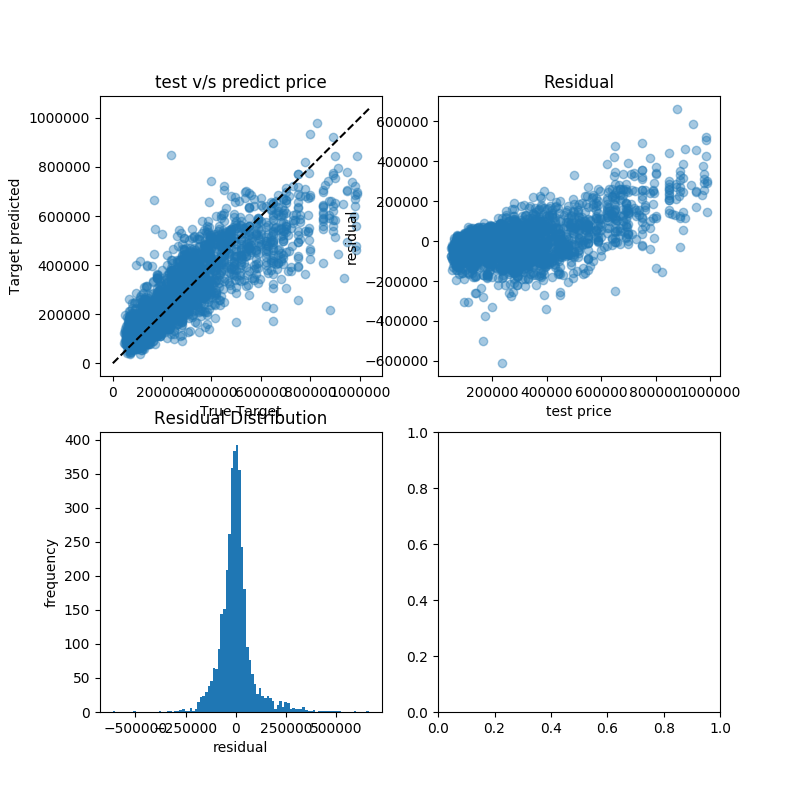

(<Figure size 800x800 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33e1ea79e8>,
       dtype=object))

In [28]:
plot_predict_result(y_test, y_pred_ENet)

36 features, reduction of 7.69%


<IPython.core.display.Javascript object>


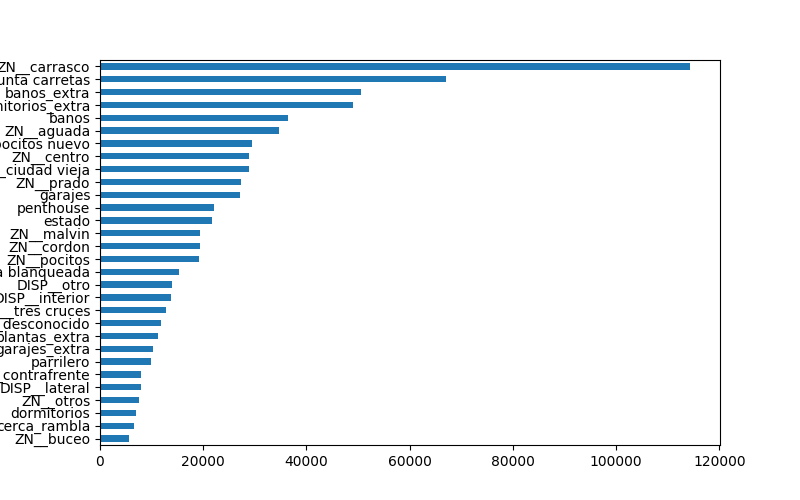

In [29]:

feature_importance = pd.Series(index = X_train.columns, data = np.abs(cv_model.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

f, ax = plt.subplots(figsize = (8, 5))
feature_importance.sort_values().tail(30).plot(kind='barh', ax=ax);

# Regression Tree

In [30]:
cls_tree = DecisionTreeRegressor()
cls_tree.fit(X_train, y_train)


predicted_price_tree = cls_tree.predict(X_test)
print(get_scores(predicted_price_tree, y_test))

scores_accuracy = cross_val_score(cls_tree, features, price, cv=10)
# scores_balanced = cross_val_score(cls_tree, features, price, cv=10, scoring="balanced_accuracy")

scores_accuracy, scores_accuracy.mean()



MSE=10324193124.13, MAE=57423.35, MEAE=27000.00, $R^2$=0.65


(array([0.65620548, 0.67672653, 0.70690427, 0.7247922 , 0.67143523,
        0.68742178, 0.69569708, 0.69809676, 0.70357248, 0.69608551]),
 0.691693730438276)

<IPython.core.display.Javascript object>


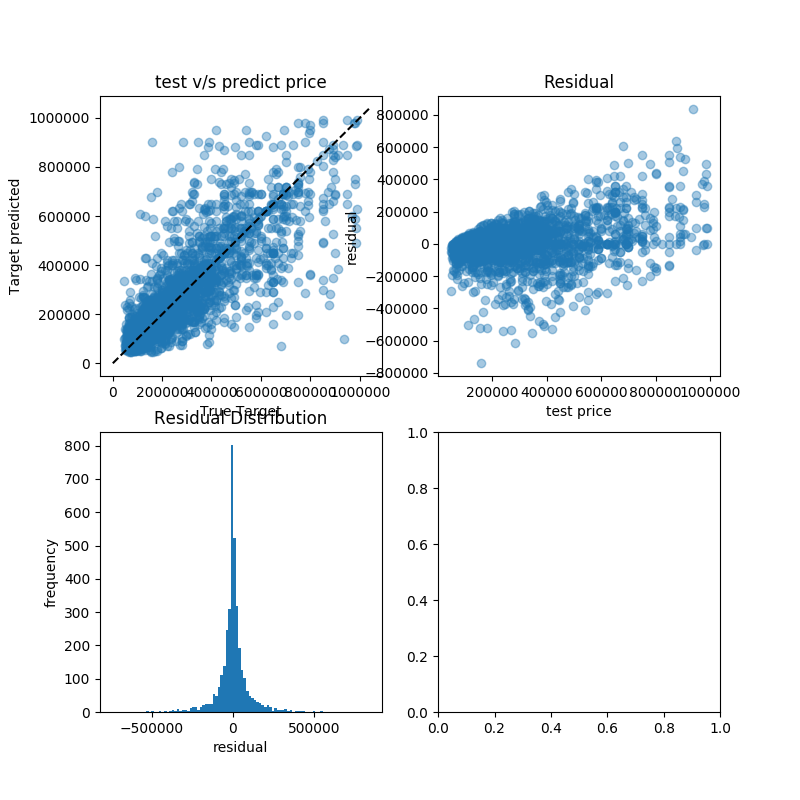

(<Figure size 800x800 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33e1ba3e10>,
       dtype=object))

In [31]:
plot_predict_result(y_test, predicted_price_tree)

<IPython.core.display.Javascript object>


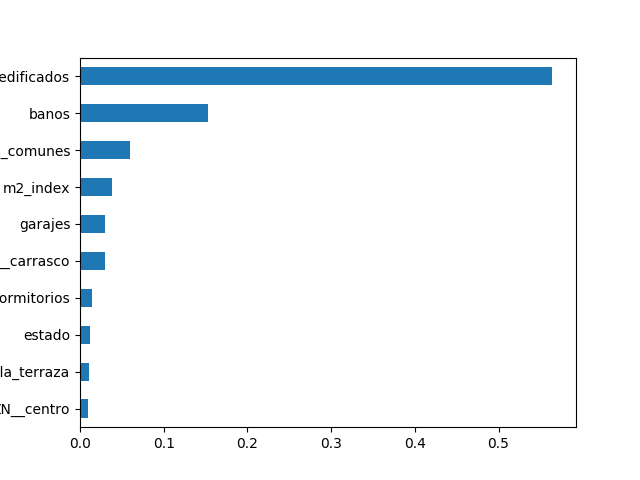

In [32]:
f, ax = plt.subplots()
(pd
 .Series(cls_tree.feature_importances_, index=X_test.columns)
 .sort_values()[-10:]
 .plot(ax=ax, kind='barh')
)

## Random Forest

In [33]:
rfr = RandomForestRegressor(n_estimators=100,)
rfr.fit(X_train, y_train)
predicted_price_rf = rfr.predict(X_test)
print(get_scores(y_test, predicted_price_rf))



MSE=4978418049.45, MAE=41699.15, MEAE=21316.00, $R^2$=0.83


<IPython.core.display.Javascript object>


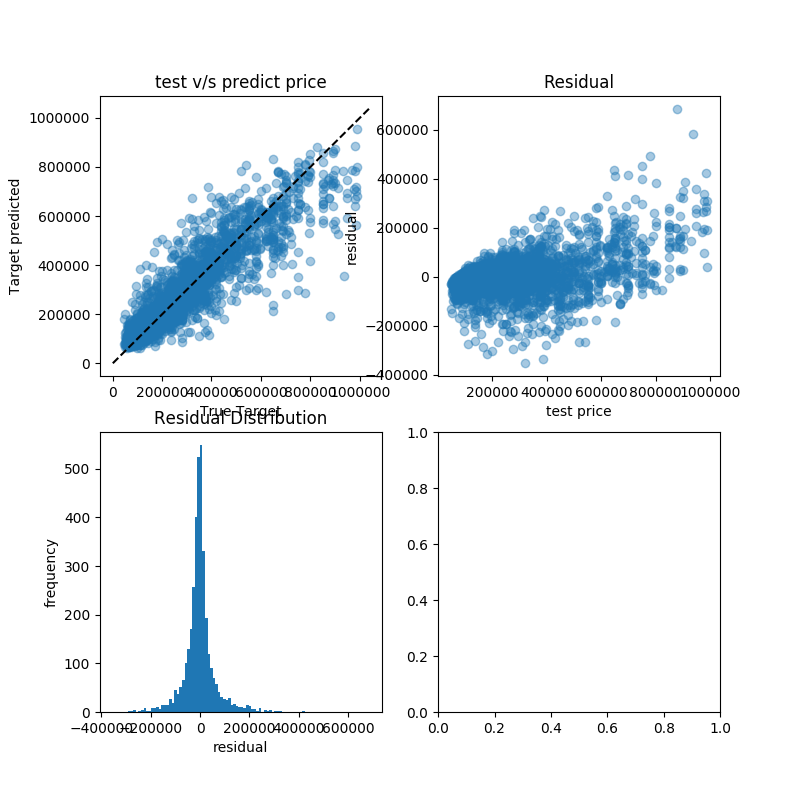

In [34]:
plot_predict_result(y_test, predicted_price_rf);


In [35]:
pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)

m2_edificados         0.569021
banos                 0.114466
gastos_comunes        0.056152
m2_index              0.037343
banos_extra           0.036695
garajes               0.031319
ZN__carrasco          0.028984
dormitorios           0.014998
estado                0.014205
m2_de_la_terraza      0.011439
ZN__punta carretas    0.010424
ZN__pocitos           0.009771
ZN__otros             0.009128
ZN__centro            0.007401
parrilero             0.006438
plantas               0.006131
cerca_rambla          0.004016
ZN__malvin            0.003527
DISP__otro            0.003484
DISP__al frente       0.003208
ZN__cordon            0.002724
ZN__prado             0.002087
ZN__pocitos nuevo     0.001836
dormitorios_extra     0.001699
ZN__la blanqueada     0.001609
garajes_extra         0.001592
ZN__buceo             0.001477
plantas_extra         0.001470
ZN__parque batlle     0.001309
ZN__aguada            0.000992
penthouse             0.000922
vivienda_social       0.000768
DISP__co

## XGboost

In [36]:
from xgboost import XGBRegressor, plot_importance 


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)

# Pipelines

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
pipe_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
#     ('scaler', QuantileTransformer()),
#     ('pca', PCA(n_components=0.8)),
    ('lineal_regresor', LinearRegression(fit_intercept=True))
    
])
pipe_lr.fit(X_train, y_train)
pred_test_price_lr = pipe_lr.predict(X_test)
pred_train_price_lr = pipe_lr.predict(X_train)
print('Test: ' + get_scores(y_test, pred_test_price_lr))
print('Train: ' + get_scores(y_train, pred_train_price_lr))


f, ax = plot_predict_result(y_test, predicted_price_lr)

## Random Forest

In [ ]:
pipe_rf = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('scaler', QuantileTransformer()),
#     ('pca', PCA(n_components=0.8)),
    ('random_forest', RandomForestRegressor(n_estimators=100,
                                            criterion='mse',
                                            n_jobs=-1))
    
])
pipe_rf.fit(X_train, y_train)
pred_test_price_rf = pipe_rf.predict(X_test)
pred_train_price_rf = pipe_rf.predict(X_train)
print('Test: ' + get_scores(y_test, pred_test_price_rf))
print('Train: ' + get_scores(y_train, pred_train_price_rf))


f, ax = plot_predict_result(y_test, pred_test_price_rf)

In [ ]:
pipe_rf = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('scaler', QuantileTransformer()),
#     ('pca', PCA(n_components=0.8)),
    ('random_forest', RandomForestRegressor(n_estimators=100,
                                            criterion='mse',
                                            n_jobs=-1))
    
])
pipe_targ_rf = TransformedTargetRegressor(
    regressor=pipe_rf,
    func=np.log,
    inverse_func=np.exp)

pipe_targ_rf.fit(X_train, y_train)
pred_test_price_rf = pipe_targ_rf.predict(X_test)
pred_train_price_rf = pipe_targ_rf.predict(X_train)
print('Test: ' + get_scores(y_test, pred_test_price_rf))
print('Train: ' + get_scores(y_train, pred_train_price_rf))


f, ax = plot_predict_result(y_test, pred_test_price_rf)

## Hiperparameters tunning

In [ ]:
rfr = RandomForestRegressor(n_estimators=100,)

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


rfr.fit(X_train, y_train)
predicted_price_rf = rfr.predict(X_test)
print(get_scores(y_test, predicted_price_rf))

In [ ]:
from time import time
from scipy.stats import randint as sp_randint

In [ ]:
# build a classifier
clf = RandomForestRegressor(n_estimators=20, n_jobs=-1)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



In [ ]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
              "criterion": ["mse", "mae"]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)